<a href="https://colab.research.google.com/github/merve215/dogecoin-sentiment-analysis/blob/main/3)Analyzing_Returns_to_Doge%2C_BTC%2C_S%26P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Make sure : MyDrive -> Big_Data_Project
!ls /content/drive/MyDrive/Big_Data_Project

Mounted at /content/drive
'0) Converitng to Excels.py'		     'Crypto SubReddit Analysis .ipynb'
'1) SubReddits Filtered.ipynb'		      Lexicon
'2-1) doge_anaylsis_part1.py'		      Output
'2-2)doge_analysis_part2.ipynb'		      Price_Data
 AC2.ipynb				      Python_SubReddit_Data
'Analyzing Returns to Doge, BTC, S&P.ipynb'   reddit2
'Big Data Project Code.ipynb'		      SubReddits
'Big Data Project.gdoc'			     'Word Cloud.ipynb copy'
'Copy of 2-2)doge_analysis_part2.ipynb'


In [ ]:
!ls /content/drive/MyDrive/Big_Data_Project
!ls /content/drive/MyDrive/Big_Data_Project/Output

'0) Converitng to Excels.py'		     'Crypto SubReddit Analysis .ipynb'
'1) SubReddits Filtered.ipynb'		      Lexicon
'2-1) doge_anaylsis_part1.py'		      Output
'2-2)doge_analysis_part2.ipynb'		      Price_Data
 AC2.ipynb				      Python_SubReddit_Data
'Analyzing Returns to Doge, BTC, S&P.ipynb'   reddit2
'Big Data Project Code.ipynb'		      SubReddits
'Big Data Project.gdoc'			     'Word Cloud.ipynb copy'
'Copy of 2-2)doge_analysis_part2.ipynb'
 crypto_doge_related_posts.csv
 Crypto_doge_related_posts.csv
 dogecoin_posts.csv
 entiredoge_sentiment_results_daily.csv
 firstdoge_analysis_results.csv
 firstdoge_Merged_Sentiment_Results.csv
 firstdoge_Merged_Sentiment_Results_Daily.csv
 investing_doge_related_posts.csv
 investing_doge_related_posts.gsheet
 investing_FinBERT_Sentiment_Results.csv
 investing_Merged_Sentiment_Results.csv
 investing_Merged_Sentiment_Results_Daily.csv
 investing_sentiment_vs_price.png
'normlaized.investing_sentiment_vs_price change.png'
 perf_doge_related_posts.c

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm
import statsmodels.api as sm


# Analyzing Returns to Doge, BTC, S&P

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load price data for Dogecoin, Bitcoin, and SPY
doge_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/doge_price.csv'
btc_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/btc_price.csv'
spy_file = '/content/drive/MyDrive/Big_Data_Project/Price_Data/spy_price.csv'

doge_df = pd.read_csv(doge_file)
btc_df = pd.read_csv(btc_file)
spy_df = pd.read_csv(spy_file)

In [ ]:
# Ensure 'date' columns are properly formatted
doge_df.rename(columns={'Date': 'date', 'Price': 'doge_price'}, inplace=True)
btc_df.rename(columns={'Date': 'date', 'Price': 'btc_price'}, inplace=True)
spy_df.rename(columns={'Date': 'date', 'Price': 'spy_price'}, inplace=True)

doge_df['date'] = pd.to_datetime(doge_df['date'])
btc_df['date'] = pd.to_datetime(btc_df['date'])
spy_df['date'] = pd.to_datetime(spy_df['date'])

In [ ]:
#drop unnecessary columns
doge_df = doge_df.filter(['date', 'doge_price'])
btc_df = btc_df.filter(['date', 'btc_price'])
spy_df = spy_df.filter(['date', 'spy_price'])

In [ ]:
# Convert 'btc_price' to numeric
btc_df['btc_price'] = pd.to_numeric(btc_df['btc_price'].str.replace(',', ''), errors='coerce')


In [ ]:
print(btc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2171 non-null   datetime64[ns]
 1   btc_price  2171 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.0 KB
None


In [ ]:
# Convert 'spy_price' to numeric
spy_df['spy_price'] = pd.to_numeric(spy_df['spy_price'].str.replace(',', ''), errors='coerce')

In [ ]:
print(spy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1496 non-null   datetime64[ns]
 1   spy_price  1496 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.5 KB
None


In [ ]:
# Ensure 'date' columns are datetime
doge_df['date'] = pd.to_datetime(doge_df['date'])
btc_df['date'] = pd.to_datetime(btc_df['date'])
spy_df['date'] = pd.to_datetime(spy_df['date'])

In [ ]:
# Merge datasets on 'date'
combined_df = pd.merge(doge_df, btc_df, on='date', how='inner')
combined_df = pd.merge(combined_df, spy_df, on='date', how='inner')

In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1496 non-null   datetime64[ns]
 1   doge_price  1496 non-null   float64       
 2   btc_price   1496 non-null   float64       
 3   spy_price   1496 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 46.9 KB
None


In [ ]:
print(combined_df)

           date  doge_price  btc_price  spy_price
0    2024-12-10    0.400181    97950.0    6053.05
1    2024-12-09    0.414694    97500.0    6052.85
2    2024-12-06    0.434837    99786.0    6090.27
3    2024-12-05    0.427350    96833.0    6075.11
4    2024-12-04    0.432015    98709.0    6086.49
...         ...         ...        ...        ...
1491 2019-01-08    0.002223     4100.0    2574.40
1492 2019-01-07    0.002230     4113.9    2549.70
1493 2019-01-04    0.002243     3954.9    2531.90
1494 2019-01-03    0.002293     3923.2    2447.90
1495 2019-01-02    0.002350     4048.5    2510.00

[1496 rows x 4 columns]


In [ ]:
# Filter the combined_df for the year 2021
combined_df = combined_df[(combined_df['date'] >= '2021-01-01') & (combined_df['date'] <= '2021-12-31')]


In [ ]:
# Normalize prices for comparison
combined_df['doge_normalized'] = combined_df['doge_price'] / combined_df['doge_price'].iloc[0]
combined_df['btc_normalized'] = combined_df['btc_price'] / combined_df['btc_price'].iloc[0]
combined_df['spy_normalized'] = combined_df['spy_price'] / combined_df['spy_price'].iloc[0]

In [ ]:
# Calculate daily returns (percentage change)
combined_df['doge_return'] = combined_df['doge_price'].pct_change()
combined_df['btc_return'] = combined_df['btc_price'].pct_change()
combined_df['spy_return'] = combined_df['spy_price'].pct_change()

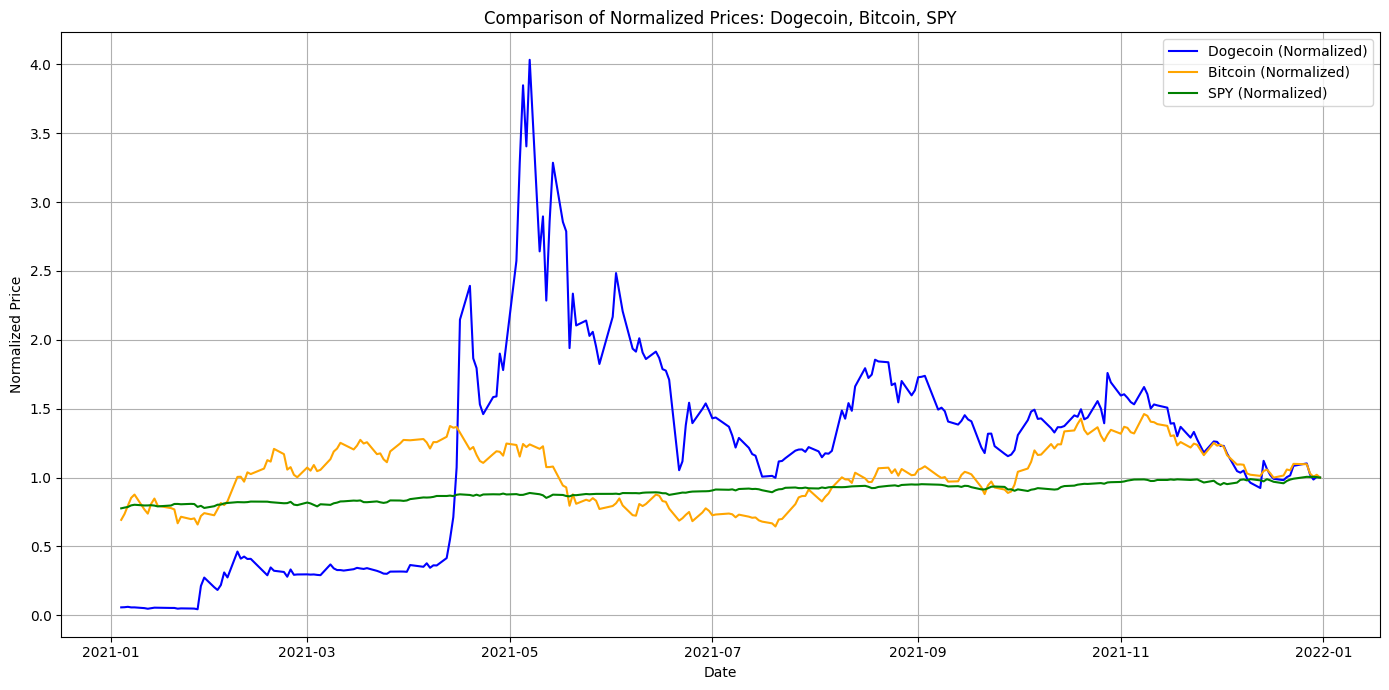

In [ ]:
# Plot normalized prices
plt.figure(figsize=(14, 7))
plt.plot(combined_df['date'], combined_df['doge_normalized'], label='Dogecoin (Normalized)', color='blue')
plt.plot(combined_df['date'], combined_df['btc_normalized'], label='Bitcoin (Normalized)', color='orange')
plt.plot(combined_df['date'], combined_df['spy_normalized'], label='SPY (Normalized)', color='green')
plt.title('Comparison of Normalized Prices: Dogecoin, Bitcoin, SPY')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

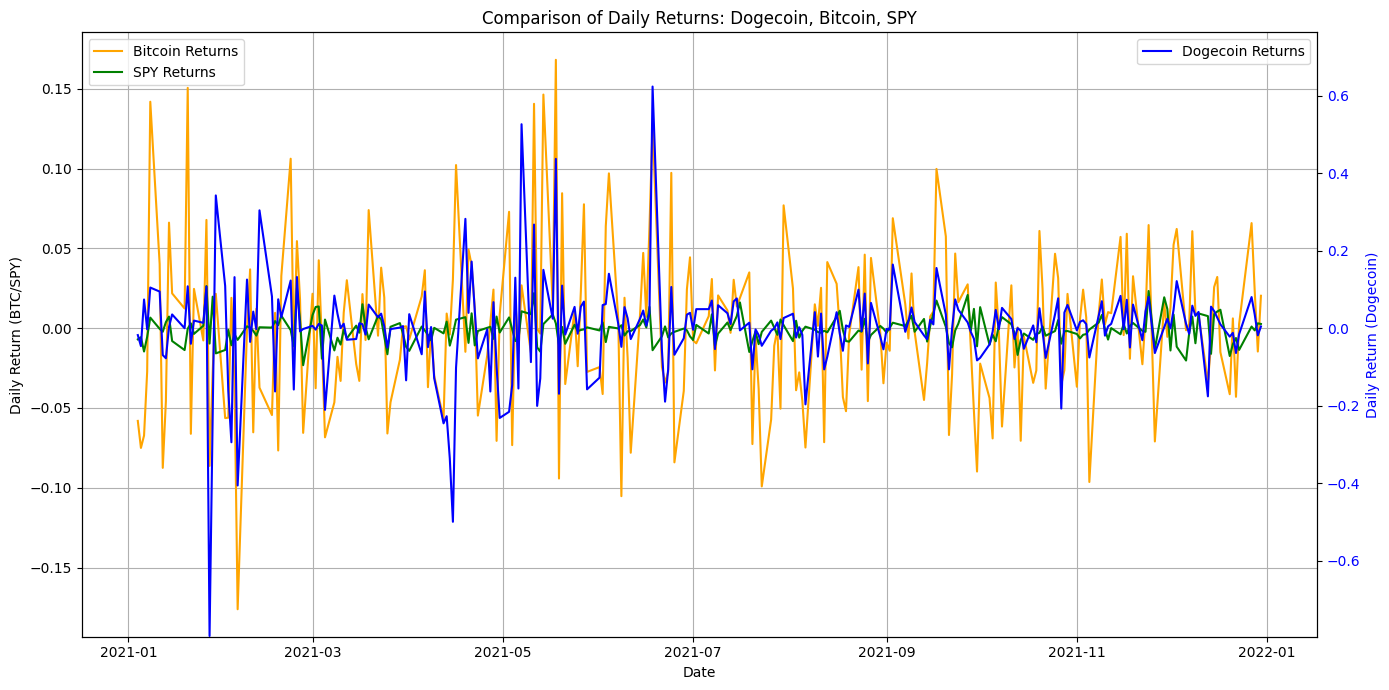

In [ ]:
# Plot daily returns with Dogecoin on a secondary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary axis for Bitcoin and SPY returns
ax1.plot(combined_df['date'], combined_df['btc_return'], label='Bitcoin Returns', color='orange')
ax1.plot(combined_df['date'], combined_df['spy_return'], label='SPY Returns', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return (BTC/SPY)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid()
ax1.legend(loc='upper left')

# Secondary axis for Dogecoin returns
ax2 = ax1.twinx()
ax2.plot(combined_df['date'], combined_df['doge_return'], label='Dogecoin Returns', color='blue')
ax2.set_ylabel('Daily Return (Dogecoin)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

# Synchronize zero line alignment
primary_min, primary_max = ax1.get_ylim()
secondary_min, secondary_max = ax2.get_ylim()

# Find the scaling factor to align zeros
primary_range = primary_max - primary_min
secondary_range = secondary_max - secondary_min

secondary_zero_ratio = -secondary_min / secondary_range
primary_zero_ratio = -primary_min / primary_range

scaling_factor = secondary_range / primary_range

# Adjust the secondary axis limits to align zero
new_secondary_min = secondary_min - (primary_zero_ratio - secondary_zero_ratio) * secondary_range
new_secondary_max = new_secondary_min + secondary_range
ax2.set_ylim(new_secondary_min, new_secondary_max)

# Title and layout adjustments
plt.title('Comparison of Daily Returns: Dogecoin, Bitcoin, SPY')
plt.tight_layout()
plt.show()

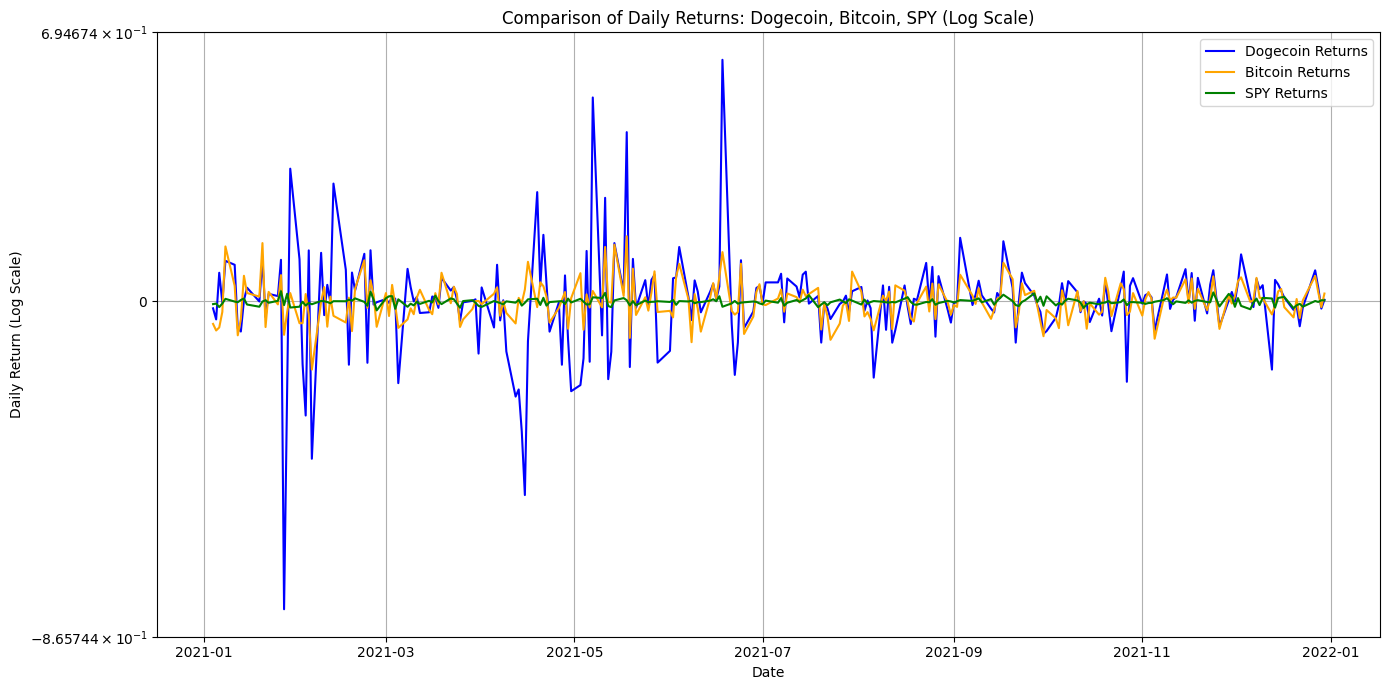

In [ ]:
# Plot daily returns with a logarithmic scale
plt.figure(figsize=(14, 7))
plt.plot(combined_df['date'], combined_df['doge_return'], label='Dogecoin Returns', color='blue')
plt.plot(combined_df['date'], combined_df['btc_return'], label='Bitcoin Returns', color='orange')
plt.plot(combined_df['date'], combined_df['spy_return'], label='SPY Returns', color='green')
plt.title('Comparison of Daily Returns: Dogecoin, Bitcoin, SPY (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Daily Return (Log Scale)')
plt.yscale('symlog')  # Use symmetric log scale
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

OLS Regression using Bitcoin returns to predict Dogecoin returns

In [ ]:
def ols_predict_doge_from_btc(combined_df):

    # Ensure there are no missing values in the columns of interest
    combined_df = combined_df[['btc_return', 'doge_return']].dropna()

    # Define the independent variable (BTC returns) and add a constant for the intercept
    X = sm.add_constant(combined_df['btc_return'])

    # Define the dependent variable (Dogecoin returns)
    y = combined_df['doge_return']

    # Perform OLS regression
    model = sm.OLS(y, X).fit()

    # Generate predictions
    predictions = model.predict(X)

    # Print the summary of the regression
    print(model.summary())

    return model, predictions

# Example usage
ols_model, doge_predictions = ols_predict_doge_from_btc(combined_df)

                            OLS Regression Results                            
Dep. Variable:            doge_return   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     80.19
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           8.13e-17
Time:                        23:02:52   Log-Likelihood:                 199.65
No. Observations:                 251   AIC:                            -395.3
Df Residuals:                     249   BIC:                            -388.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.007     -0.166      0.8

OLS Regression using S&P returns to predict Dogecoin returns

In [ ]:

def ols_predict_doge_from_spy(combined_df):

    # Ensure there are no missing values in the columns of interest
    combined_df = combined_df[['spy_return', 'doge_return']].dropna()

    # Define the independent variable (BTC returns) and add a constant for the intercept
    X = sm.add_constant(combined_df['spy_return'])

    # Define the dependent variable (Dogecoin returns)
    y = combined_df['doge_return']

    # Perform OLS regression
    model = sm.OLS(y, X).fit()

    # Generate predictions
    predictions = model.predict(X)

    # Print the summary of the regression
    print(model.summary())

    return model, predictions

# Example usage
ols_model, doge_predictions = ols_predict_doge_from_spy(combined_df)

                            OLS Regression Results                            
Dep. Variable:            doge_return   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.702
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0177
Time:                        23:05:38   Log-Likelihood:                 167.46
No. Observations:                 251   AIC:                            -330.9
Df Residuals:                     249   BIC:                            -323.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.008      0.095      0.9

OLS Regression using Bitcoin and S&P returns to predict Dogecoin returns

In [ ]:

def ols_predict_doge_from_btc_and_spy(combined_df):

    # Ensure there are no missing values in the columns of interest
    combined_df = combined_df[['btc_return', 'spy_return', 'doge_return']].dropna()

    # Define the independent variables (BTC and SPY returns) and add a constant for the intercept
    X = combined_df[['btc_return', 'spy_return']]
    X = sm.add_constant(X)  # Add intercept

    # Define the dependent variable (Dogecoin returns)
    y = combined_df['doge_return']

    # Perform OLS regression
    model = sm.OLS(y, X).fit()

    # Generate predictions
    predictions = model.predict(X)

    # Print the summary of the regression
    print(model.summary())

    return model, predictions

# Example usage
ols_model_multi, doge_predictions_multi = ols_predict_doge_from_btc_and_spy(combined_df)


                            OLS Regression Results                            
Dep. Variable:            doge_return   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     39.98
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           8.91e-16
Time:                        23:07:03   Log-Likelihood:                 199.69
No. Observations:                 251   AIC:                            -393.4
Df Residuals:                     248   BIC:                            -382.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.007     -0.132      0.8